In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
import scipy as sp

In [2]:
df=pd.read_csv('training.csv', index_col=0)
df_test=pd.read_csv('testing.csv', index_col=0)

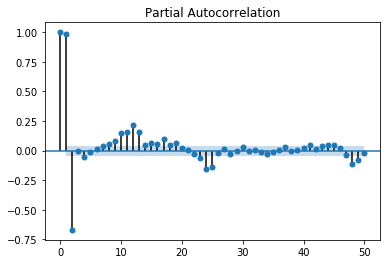

In [3]:
plot_pacf(df, lags=50)
plt.show()

In [4]:
model = AR(df)
model_fit = model.fit(maxlag=3)
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 3
Coefficients: const             1.764205
L1.temperature    1.720000
L2.temperature   -0.798661
L3.temperature    0.052104
dtype: float64


In [5]:
pred = model_fit.predict(start=3, end=len(df)-1, dynamic=False)
err = sqrt(mean_squared_error(df[3:],pred))
print('RMSE: %.3f' % err)

RMSE: 1.359


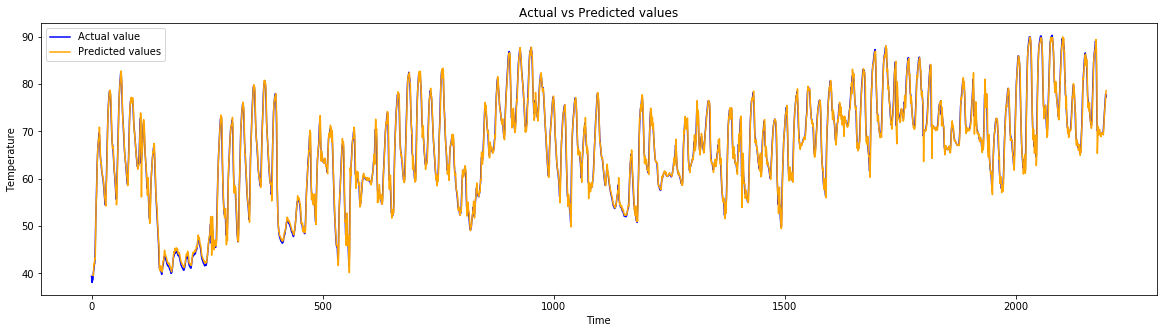

In [6]:
plt.figure(figsize=(20,5))
plt.title("Actual vs Predicted values")
plt.plot(df.temperature, label='Actual value', color='blue')
plt.plot(pred, label='Predicted values', color='orange')
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend(loc='upper left')
plt.show()

In [7]:
resid=pred - df.temperature[3:]

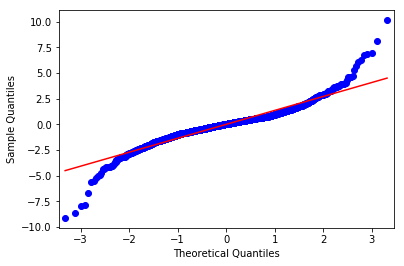

In [8]:
fig = sm.qqplot(resid, line='s')
plt.show()

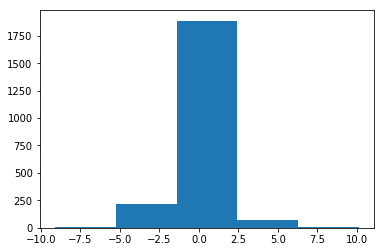

array([   8,  220, 1887,   74,    5])

In [9]:
freq,bins,_=plt.hist(resid.values, bins=5)
plt.show()
counts, bin_edges = np.histogram(resid, bins=5)
counts

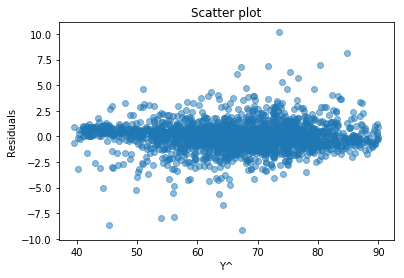

In [10]:
# Plot
plt.scatter(pred, resid,  alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Y^')
plt.ylabel('Residuals')
plt.show()


In [11]:
chi,x=sp.stats.chisquare(counts, ddof=2)

In [12]:
chi

6043.771194165907

In [13]:
#On testing data
pred1 = model_fit.predict(start=3, end=len(df_test)-1, dynamic=False)
err = sqrt(mean_squared_error(df_test[3:],pred1))
print('RMSE: %.3f' % err)

RMSE: 18.425
